<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/TKMT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng thư viện pandas để quản lý và phân tích dữ liệu

In [1]:
import pandas as pd

Đọc tập dữ liệu state.csv

In [2]:
df = pd.read_csv('state.csv')

Hiển thị các thông số cơ bản của tập dữ liệu

In [3]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
df.shape

(50, 4)

Ghi chú: Nếu có cột dữ liệu ID/STT thì loại bỏ cột này vì không có ý nghĩa khi phân tích dữ liệu

PHÂN TÍCH DỮ LIỆU ĐỊNH LƯỢNG

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác (Khi thành thạo có thể không cần thực hiện thao tác sao chép này)

In [5]:
df_dl = pd.DataFrame(columns = ['Population', 'Murder.Rate'], data = df)
df_dl.head()

,Population,Murder.Rate
0,4779736,5.7
1,710231,5.6
2,6392017,4.7
3,2915918,5.6
4,37253956,4.4


In [6]:
df_dl.shape

(50, 2)

Tính các thông số thống kê định lượng

In [7]:
print('Giá trị trung bình: ', df_dl['Population'].mean(), "; ", df_dl['Murder.Rate'].mean())

Giá trị trung bình:  6162876.3 ;  4.066


In [8]:
print('Giá trị lớn nhất: ', df_dl['Population'].max(), "; ", df_dl['Murder.Rate'].max())

Giá trị lớn nhất:  37253956 ;  10.3


In [9]:
print('Giá trị nhỏ nhất: ', df_dl['Population'].min(), "; ", df_dl['Murder.Rate'].min())

Giá trị nhỏ nhất:  563626 ;  0.9


In [10]:
print('Độ lệch chuẩn: ', df_dl['Population'].std(), "; ", df_dl['Murder.Rate'].std())

Độ lệch chuẩn:  6848235.347401142 ;  1.915736124302923


In [11]:
print('Phương sai: ', df_dl['Population'].var(), "; ", df_dl['Murder.Rate'].var())

Phương sai:  46898327373394.445 ;  3.670044897959184


In [12]:
print('Q1 của  Population', df_dl['Population'].quantile(0.25), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.25))

Q1 của  Population 1833004.25 ; của Murder.Rate 2.425


In [13]:
print('Q2 của  Population', df_dl['Population'].quantile(0.50), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.50))

Q2 của  Population 4436369.5 ; của Murder.Rate 4.0


In [14]:
print('Q3 của  Population', df_dl['Population'].quantile(0.75), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.75))

Q3 của  Population 6680312.25 ; của Murder.Rate 5.55


In [16]:
print('IQR ',df_dl['Population'].quantile(0.75) - df_dl['Population'].quantile(0.25), "; ", df_dl['Murder.Rate'].quantile(0.75) - df_dl['Murder.Rate'].quantile(0.25) )

IQR  4847308.0 ;  3.125


Có thể thay các phép tính riêng biệt trên bằng cách sử dụng hàm describe

In [17]:
df_dl.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Mô tả trực quan hóa dữ liệu định lượng

In [19]:
import matplotlib.pyplot as plt

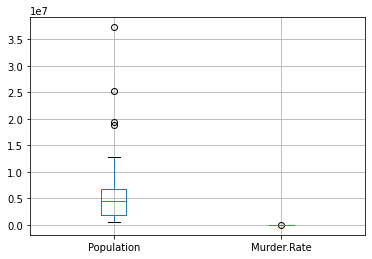

In [20]:
boxplot = df_dl.boxplot(column=['Population', 'Murder.Rate'])

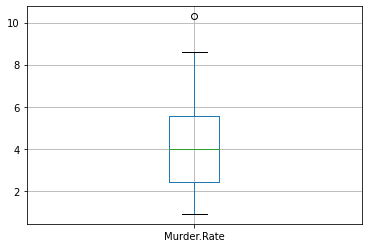

In [21]:
df_dl.boxplot(column=['Murder.Rate'])

Xem xét mối quan hệ giữa 2 biến định lượng có thể sử dụng công cụ trực quan scatterplot

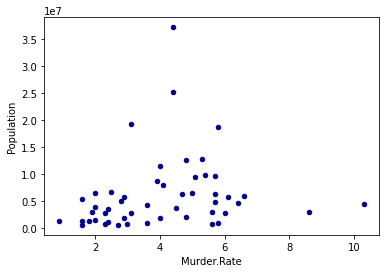

In [22]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')

Mối quan hệ giữa 2 cột dữ liệu định lượng còn được biểu hiện qua hệ số tương quan (correlation). Trong pandas có thể tính hệ số này như sau:

In [23]:
df_dl.corr(method='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

Câu trả lời:

##Corrlation (Tương quan): Mối liên hệ giữa hai biến.

Các đại lượng để đo lường mối quan liên hệ giữa hai biến:

1. Hiệp phương sai (covariance):

* Công thức tính hiệp phương sai mẫu:
\begin{align}
        s_{xy} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i - \overline{y})}{n-1}
    \end{align}

Với: 

($x_1$, $y_1$), ($x_2$, $y_2$), ..., ($x_n$, $y_n$) là các quan sát của một mẫu với kích thước n.

$\overline{x}$ là trung bình của $x_1$, $x_2$, ..., $x_n$

$\overline{y}$ là trung bình của $y_1$, $y_2$, ..., $y_n$

* Ý nghĩa của hiệp phương sai:

Ta viết hàm để tính hiệp phương sai:

In [49]:
def covariance(x, y):
    # Tính trung bình của x, y
    mean_x = x.mean()
    mean_y = y.mean()
    # Tập hợp các hiệu của phần từ x,y trừ đi trung bình của nó
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

Hiệp phương sai giữa Murder.Rate và Population:

In [54]:
covariance(df_dl['Murder.Rate'], df_dl['Population'])

2388642.6940816334

Ta tiến hành vẽ hai đường thằng x = $\overline{x}$ và y = $\overline{y}$ trong biểu đồ scatter trên:

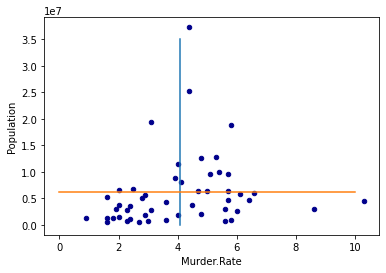

In [52]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')
plt.plot([df_dl['Murder.Rate'].mean() for i in range(2)],
         [0, 35 * (10 ** 6)]);
plt.plot([0, 10],
         [df_dl['Population'].mean() for i in range(2)]);

Ý nghĩa: 
> Khi hiệp phương sai dương thì các điểm của đồ thị scatter đa số sẽ nằm trên góc phần tư thứ nhất và thứ ba và âm thì nằm trên góc phần tư thứ hai và thứ tư. Hay ta có thể nói nếu như hiệp phương sai dương thì hai biến sẽ có mối quan hệ thuận (x tăng thì y tăng) và âm thì có mối quan hệ nghịch (x tăng thì y giảm)

> Giá trị của hiệp phương sai càng lớn thì mối quan hệ tuyến tính càng mạnh. Tuy nhiên đơn vị là một vấn đề lớn bởi với một đơn vị ta lại có một kết quả hiệp phương sai khác nhau. Do đó ta cần một đại lượng khác để đo lường mối quan hệ mà không bị ảnh hưởng bởi đơn vị đo, đó là **Correlation coefficient (Hệ số tương quan)**



2. Correlation coefficient (Hệ số tương quan)

* Công thức tính hệ số tương quan tích moment Pearson: dữ liệu mẫu:
\begin{align}
        r_{xy} = \frac{s_{xy}}{s_x s_y}
    \end{align}

Với:

> $s_{xy}$ là hiệp phương sai của x,y

> $s_x$ là phương sai của x

> $s_y$ là phương sai của y



* Ý nghĩa: 

> Hệ số tương quan nằm trong khoảng từ -1 đến +1. Càng tiến gần đến -1 hoặc +1 thì mối quan hệ tuyến tính càng mạnh

> Hệ số tương quan dương thì hai biến có mối quan hệ thuận (x tăng, y tăng)

> Hệ số tương quan âm thì hai biến có mối quan hệ nghịch (x tăng, y giảm)